# Quickstart Guide

Congratulations on successfully installing Sequenzo! 🎉 You're now ready to explore social sequence analysis with ease.

In this guide, we'll walk you through analyzing country-level CO₂ emissions sequences step by step. If you're curious about how we transformed the original dataset into a format suitable for sequence analysis, you can find the detailed explanation here (TODO: webpage on SequenzoWebsite).

New to Python? No worries! We've designed Sequenzo to be intuitive and beginner-friendly, so you can jump right in regardless of whether you are a newbie or a seasoned Python coder. 

By the end of this tutorial, you'll learn how to:

1. Install Sequenzo
2. Load and explore a dataset
3. Analyze social sequences
4. Visualize the results

Now, let's get started on this exciting journey! 🐍✨


## 1. Get a rough idea of the data

In [1]:
# Import necessary libraries
from sequenzo import * # Social sequence analysis 
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
df = load_dataset('country_co2_emissions')

# Show the dataframe
df

Available datasets in Sequenzo:  ['chinese_colonial_territories', 'country_co2_emissions', 'country_gdp_per_capita']


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,High,High,High,High,High,High
1,Albania,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
2,Algeria,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
3,Andorra,High,High,High,High,High,High,High,High,High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High
4,Angola,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,High,High,High,High,High,High,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,Very High,Very High,Very High,Very High,Very High,High,Middle,High,High,High
190,Vietnam,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,High,High,High,High,Very High,Very High,Very High,Very High,Very High
191,Yemen,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,Very Low,...,High,High,High,High,High,High,High,High,High,High
192,Zambia,High,High,High,High,High,High,High,High,High,...,High,High,High,High,High,High,High,High,High,High


The classification is based on all years' CO₂ per capita values:

* Very Low (Bottom 20%)
* Low (20-40%)
* Middle (40-60%)
* High (60-80%)
* Very High (Top 20%)

Using a jorgan in social sequence analysis, each category is called a **state**, and the sequence of states is called a social sequence. In sum, the dataset shows the level of the CO₂ emissions per capita of each country in each year. 

If we take Andorra as an example:  

In [2]:
# Filter the data for Andorra
andorra_df = df[df['country'] == 'Andorra']

# Show the Andorra df
andorra_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Andorra,High,High,High,High,High,High,High,High,High,...,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High,Very High


Based on the outcome, which is a subset of the original dataset, we can see that Andorra's CO₂ emissions per capita have undergone the following changes over the years:

* 1990-1991: Started at "Very High" levels, indicating emissions in the top 20% of all countries
* 1992-1997: Dropped to "High" level (60-80th percentile)
* 1998: Brief return to "Very High" level
* 2000s onwards: Stabilized at "High" level (60-80th percentile) and maintained this classification through 2019

But it comes with a question: What if we want to analyze the sequences of all countries? 🤔 

Here we need Sequenzo to help us!

## 2. Analyze Social Sequences with Sequenzo

In [3]:
# Create a SequenceData object

# Define the time-span variable
time = list(df.columns)[1:]

states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']

sequence_data = SequenceData(df, time=time, time_type="year", id_col="country", states=states)

sequence_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 194
[>] Min/Max sequence length: 223 / 223
[>] Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High']


SequenceData(194 sequences, Alphabet: ['Very Low', 'Low', 'Middle', 'High', 'Very High'])

Now we have successfully created the `SequenceData` object based on our original dataframe, which is the core object in Sequenzo for analyzing social sequences.

With our naked eyes, we might be only able to see the sequences of one country at a time. However, with the help of Sequenzo, we can analyze all the sequences of countries in one go. The most important tool is **visualization**, which helps us to understand the patterns and trends in the data.

Among the various visualization methods, the most commonly used one is the **index plot**. Let's see how it works.

In [4]:
# Plot the index plot
# TODO: debug the plot_sequence_index function

plot_sequence_index(sequence_data, sortv='lexical', id_group_df='region')

TypeError: object of type 'NoneType' has no len()

But what if we would like to know more? state distribution plot. 

In [ ]:
# Plot the state distribution

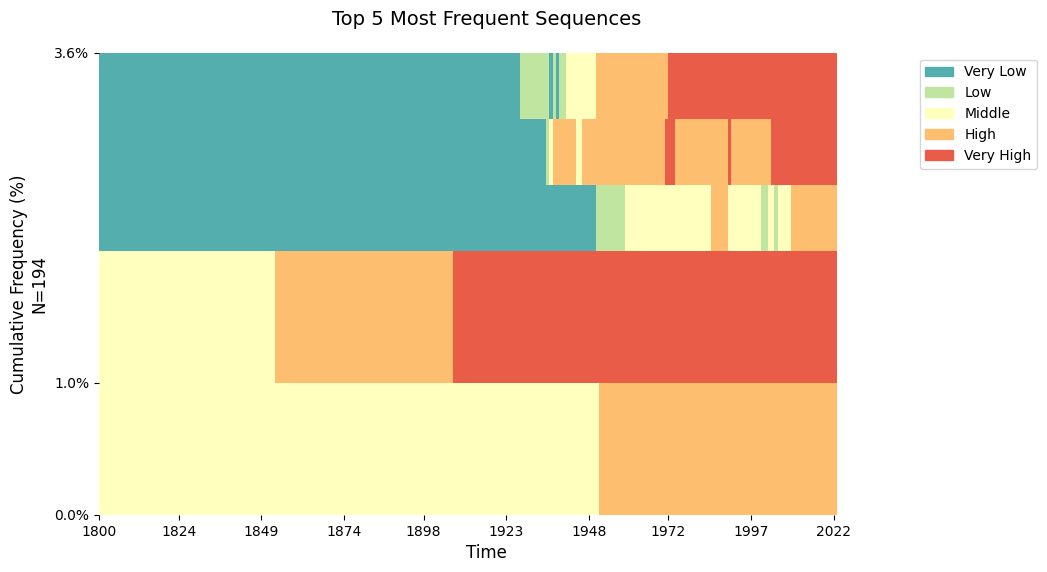

In [4]:
plot_most_frequent_sequences(sequence_data, top_n=5)

In [5]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
ham = get_distance_matrix(seqdata=sequence_data,
                              method='HAM',
                              sm="TRATE",
                              indel="auto")
ham

[>] Processing 194 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 192 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting (Dynamic) Hamming Distance(DHD/HAM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,136.266375,149.123428,407.965822,387.646944,406.687396,407.904062,273.107285,407.911030,407.936329,...,146.053790,287.802182,318.267701,287.818563,402.891036,181.872576,400.079171,117.726411,405.772939,405.990973
Albania,136.266375,46.000000,85.510706,323.965822,374.872308,332.577210,323.753783,189.537217,323.911030,323.836245,...,235.109584,203.802531,250.227309,203.818563,322.834066,95.872421,353.496274,83.903667,323.797407,323.806052
Algeria,149.123428,85.510706,100.000000,399.965822,404.868428,390.386027,399.434048,265.127478,399.911030,399.679185,...,214.412182,279.745131,288.375348,279.812599,398.394326,171.916345,405.763777,147.535937,399.477673,399.743500
Andorra,407.965822,323.965822,399.965822,248.000000,443.882334,441.822659,345.428168,443.185873,368.810928,323.993971,...,443.965822,426.938335,443.919818,426.888099,441.872895,443.965822,443.781862,443.965822,248.000000,438.959209
Angola,387.646944,374.872308,404.868428,443.882334,0.000000,216.401087,332.225969,298.916270,331.965752,332.693861,...,323.345268,312.281367,150.322156,314.312241,216.999262,325.909628,112.487812,312.999808,332.895240,329.722375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,181.872576,95.872421,171.916345,443.965822,325.909628,386.300886,395.500322,207.379966,443.911030,427.835239,...,231.337151,299.550137,310.291772,305.461551,258.433275,160.000000,400.243776,209.872576,413.492509,413.398281
Vietnam,400.079171,353.496274,405.763777,443.781862,112.487812,251.224154,412.384047,295.584849,441.764808,434.347012,...,424.368432,402.927952,301.430191,408.844441,150.844736,400.243776,8.000000,325.738387,299.361938,275.345669
Yemen,117.726411,83.903667,147.535937,443.965822,312.999808,420.843493,443.895543,271.674174,443.911030,443.931217,...,209.963234,323.801330,322.364113,323.818563,308.949588,209.872576,325.738387,2.000000,309.934365,309.848541
Zambia,405.772939,323.797407,399.477673,248.000000,332.895240,399.405137,241.428168,355.539900,364.810928,349.993971,...,442.403099,358.784025,407.053608,356.836662,238.689852,413.492509,299.361938,309.934365,0.000000,210.444842


In [6]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
dhd = get_distance_matrix(seqdata=sequence_data,
                              method='DHD',
                              sm="TRATE",
                              indel="auto")
dhd

[>] Processing 194 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 192 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting (Dynamic) Hamming Distance(DHD/HAM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,269.479241,294.417417,816.000000,769.738408,813.837745,815.956522,545.700440,816.000000,816.000000,...,286.416081,575.443970,634.157688,575.474273,803.582310,363.629812,796.546615,230.707224,807.966978,808.426858
Albania,269.479241,92.000000,170.493846,648.000000,747.696958,666.444084,647.580219,379.008745,648.000000,647.740866,...,465.360116,407.443970,500.104181,407.474273,646.919919,191.593662,707.283527,167.126378,647.580219,647.710982
Algeria,294.417417,170.493846,200.000000,800.000000,807.350917,781.879861,798.921044,530.114988,800.000000,799.347632,...,424.580338,559.309184,575.775515,559.474273,797.957053,343.710831,811.861347,292.882279,798.921044,799.671377
Andorra,816.000000,648.000000,800.000000,496.000000,888.000000,886.237495,695.404430,887.468050,742.861782,651.576190,...,888.000000,855.378914,888.000000,855.320622,886.237495,888.000000,887.905298,888.000000,496.000000,885.387914
Angola,769.738408,747.696958,807.350917,888.000000,0.000000,430.869123,666.963371,598.626632,666.721404,667.400123,...,643.407665,626.025601,299.750579,630.103027,431.944101,653.172139,223.420132,623.150863,663.955534,660.224433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,363.629812,191.593662,343.710831,888.000000,653.172139,773.965418,790.690523,414.623987,888.000000,855.441044,...,462.875094,598.803548,620.916511,610.396870,518.175045,320.000000,801.692564,419.629812,826.609504,826.481134
Vietnam,796.546615,707.283527,811.861347,887.905298,223.420132,501.785463,827.077935,591.929028,886.424206,870.250105,...,843.983688,807.345693,603.195828,818.940896,300.621217,801.692564,16.000000,650.912289,597.735519,551.986520
Yemen,230.707224,167.126378,292.882279,888.000000,623.150863,842.273975,887.729417,542.975086,888.000000,887.915753,...,413.082365,647.401846,642.851993,647.474273,618.690628,419.629812,650.912289,4.000000,619.546560,619.622038
Zambia,807.966978,647.580219,798.921044,496.000000,663.955534,801.165998,487.404430,711.905670,734.861782,703.576190,...,879.373165,718.753337,814.293904,715.132025,479.834969,826.609504,597.735519,619.546560,0.000000,428.614324


In [7]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
omspell = get_distance_matrix(seqdata=sequence_data,
                              method='OMspell',
                              sm="TRATE",
                              indel="auto")
omspell

[>] Processing 194 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 192 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 24.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,6.644856e+01,68.466725,213.0,183.5,177.000000,186.500000,105.500000,181.500000,182.500000,...,89.500000,115.500000,147.498799,115.500000,166.466725,8.989713e+01,165.000000,5.750000e+01,213.5,1.808433e+02
Albania,66.448563,-1.462380e-308,53.966725,180.5,194.0,179.500000,178.000000,95.967925,174.000000,161.000000,...,119.000000,101.000000,136.948563,102.000000,173.000000,7.450000e+01,185.484492,5.500000e+01,200.0,1.645000e+02
Algeria,68.466725,5.396672e+01,0.000000,153.5,186.0,151.500000,144.000000,88.000000,145.000000,147.000000,...,105.000000,75.000000,122.997558,75.000000,189.000000,3.850000e+01,180.483271,6.694856e+01,204.0,1.905000e+02
Andorra,213.000000,1.805000e+02,153.500000,0.0,169.5,168.000000,52.500000,164.500000,66.500000,127.500000,...,223.498799,116.500000,186.500000,106.500000,157.500000,1.360000e+02,166.000000,1.695000e+02,124.5,1.850000e+02
Angola,183.500000,1.940000e+02,186.000000,169.5,0.0,132.500000,152.000000,165.000000,169.000000,188.000000,...,155.000000,169.000000,126.948563,169.000000,95.000000,2.025000e+02,58.500000,1.550000e+02,170.0,1.735000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,89.897127,7.450000e+01,38.500000,136.0,202.5,160.000000,133.500000,100.500000,128.500000,126.500000,...,110.500000,60.500000,131.500000,61.500000,199.500000,-1.462380e-308,197.000000,9.050000e+01,214.5,1.950000e+02
Vietnam,165.000000,1.854845e+02,180.483271,166.0,58.5,121.998799,140.500000,154.500000,157.500000,169.500000,...,149.500000,162.500000,104.500000,163.500000,74.467925,1.970000e+02,0.000000,1.445000e+02,170.5,1.568959e+02
Yemen,57.500000,5.500000e+01,66.948563,169.5,155.0,192.448563,169.948563,114.948563,185.967925,196.967925,...,107.948563,124.948563,151.000000,124.948563,152.000000,9.050000e+01,144.500000,-1.462380e-308,170.0,1.784679e+02
Zambia,213.500000,2.000000e+02,204.000000,124.5,170.0,206.500000,123.000000,196.000000,189.000000,204.000000,...,224.948563,196.000000,218.000000,195.000000,159.000000,2.145000e+02,170.500000,1.700000e+02,0.0,1.895000e+02


In [8]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
om = get_distance_matrix(seqdata=sequence_data,
                              method='OM',
                              sm="TRATE",
                              indel="auto")
om

[>] Processing 194 sequences with 5 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [Very Low, Low, Middle, High, Very High]
[>] Indel cost generated.

[>] Identified 192 unique sequences.
[>] Sequence length: min/max = 223 / 223.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.000000,127.990369,117.026911,4.058117e+02,350.590776,314.902201,333.646593,181.634260,333.354258,339.845690,...,138.244121,223.003594,267.849675,224.967665,314.886693,155.382760,304.586641,107.758518,4.057729e+02,333.298081
Albania,127.990369,0.000000,33.598331,2.778141e+02,323.134848,282.771486,275.806432,139.664504,275.791778,275.819866,...,183.379328,149.860427,202.162528,151.824498,269.116035,45.850602,284.092396,35.891770,2.777974e+02,275.735600
Algeria,117.026911,33.598331,0.000000,2.994958e+02,289.536517,257.302133,281.579689,123.937967,281.565034,281.593123,...,97.169786,141.934630,168.821380,143.901334,257.286625,47.948563,256.680585,29.935851,2.994777e+02,281.508857
Andorra,405.811651,277.814148,299.495808,0.000000e+00,195.882334,193.822659,97.428168,195.185873,120.810928,75.993971,...,195.965822,178.938335,195.919818,178.888099,193.872895,195.965822,195.781862,195.965822,2.447768e-304,190.959209
Angola,350.590776,323.134848,289.536517,1.958823e+02,0.000000,183.671270,298.890103,265.947280,296.588720,299.242923,...,299.939384,276.973287,135.214768,278.941212,180.717018,307.717703,103.550956,303.237722,3.328952e+02,297.029779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,155.382760,45.850602,47.948563,1.959658e+02,307.717703,264.560828,235.825295,101.608155,199.911030,153.835239,...,214.990916,107.906951,186.500534,107.922459,229.111123,0.000000,230.505083,49.872576,2.534925e+02,237.703026
Vietnam,304.586641,284.092396,256.680585,1.957819e+02,103.550956,108.478023,209.029326,190.960953,190.139676,152.507326,...,240.402377,188.658017,99.652471,192.606580,104.625683,230.505083,0.000000,278.712823,2.913619e+02,221.836532
Yemen,107.758518,35.891770,29.935851,1.959658e+02,303.237722,279.333149,299.630405,145.968984,199.911030,169.931217,...,209.912998,149.801330,190.821380,147.818563,279.317641,49.872576,278.712823,0.000000,3.079344e+02,307.436159
Zambia,405.772939,277.797407,299.477673,2.447768e-304,332.895240,285.405137,97.428168,257.539900,120.810928,75.993971,...,442.403099,184.784025,299.053608,180.836662,238.689852,253.492509,291.361938,307.934365,0.000000e+00,210.444842


In [9]:
result = clara(seqdata=sequence_data,
               R=2,
               kvals=range(2,21),
               sample_size=3000,
               criteria=['distance', 'pbm'],
               parallel=True,
               stability=True)
result

 [>] Starting generalized CLARA for sequence analysis.
 [>] Using crisp clustering optimizing the following criterion: distance, pbm.
 [>] Aggregating 194 sequences... OK (192 unique cases).
 [>] Starting iterations...


 [>] Aggregating iterations for each k values...


{'param': {'criteria': ['distance', 'pbm'],
  'pam_combine': False,
  'all_criterias': ['distance', 'pbm'],
  'kvals': range(2, 21),
  'method': 'crisp',
  'stability': True},
 'distance': {'kvals': range(2, 21),
  'clara': {0: {'medoids': array([66, 54], dtype=int64),
    'clustering': array([2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1,
           2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1,
           1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
           1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
           1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
           2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
           2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
           1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2]),
    'evol_diss': array([110.80120

In [ ]:
pam = k_medoids_once(diss=om, k=6, weights=sequence_data.weights, npass=1, method="PAMonce")
pam